# Week 1: Exploration

Imports

In [148]:
# Import necessary modules and functions

import pandas as pd
import seaborn as sns
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [149]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [150]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

Visualization of data in original form

# Data Exploration 

In [151]:
# Import the 'KS_train_data.csv' file into a Pandas DataFrame.
ks_train = pd.read_csv('KS_train_data.csv')
pd.read_csv('KS_train_data.csv')

project_id  backers_count  \
0      KS_000000             80   
1      KS_000001             82   
2      KS_000002             21   
3      KS_000003             37   
4      KS_000004            153   
...          ...            ...   
99995  KS_099995            104   
99996  KS_099996            307   
99997  KS_099997            143   
99998  KS_099998            329   
99999  KS_099999            145   

                                                   blurb category  \
0      I will be an artist-in-residence at Elsewhere ...      art   
1      1000 Artists is a public art-making installati...      art   
2      The Sequel to ‘My Favorite Machine”, "MyPhoneH...      art   
3      A film exploring the role and value of art edu...      art   
4      We need to build a kitchen for Habitable Space...      art   
...                                                  ...      ...   
99995  Make the workshop/ small stage space at Jimmy'...  theater   
99996  Help create a permanent home for live comedy s...  theater   
99997  Voix de Ville is a pop-up imaginarium of neo-v...  theater   
99998  Help Synetic Theater create a new Studio to pr...  theater   
99999  Be part of building Cardiff's first pub theatr...  theater   

       converted_pledged_amount country  created_at currency    deadline  \
0                          3596      US  1325980505      USD  1334866560   
1                          4586      US  1330926084      USD  1336440145   
2                          5217      US  1332382894      USD  1338175739   
3                          7160      GB  1332342451      USD  1334806096   
4                         15445      US  1328562617      USD  1335584240   
...                         ...     ...         ...      ...         ...   
99995                      7595      US  1348677893      USD  1356552252   
99996                     27196      US  1364939099      USD  1367674009   
99997                      7226      US  1366078694      USD  1373738400   
99998                     31683      US  1372177000      USD  1376654340   
99999                     12639      GB  1398597170      GBP  1401465600   

        fx_rate  ...  launched_at  \
0      1.000000  ...   1332969260   
1      1.000000  ...   1332984145   
2      1.000000  ...   1332991739   
3      1.000000  ...   1332991696   
4      1.000000  ...   1332992240   
...         ...  ...          ...   
99995  1.000000  ...   1353960252   
99996  1.000000  ...   1365082009   
99997  1.000000  ...   1370568560   
99998  1.000000  ...   1373568644   
99999  1.389543  ...   1399032813   

                                                    name   pledged  \
0         Elsewhere Studios artist-in-residency program!   3596.00   
1           1000 Artists: Presidential Inauguration 2013   4586.00   
2                                           MyPhoneHenge   5217.00   
3                                           Walk-Through   7160.00   
4                         A kitchen for Habitable Spaces  15445.00   
...                                                  ...       ...   
99995  Help Fund the "Back Room" Arts Space at Jimmy'...   7595.43   
99996                              The Coalition Theater  27196.71   
99997  The Voix De Ville! : A Pop-up Theater and Cabaret   7226.00   
99998                                   Save the Studio!  31683.00   
99999       The Other Room – Cardiff’s First Pub Theatre   7555.00   

       staff_pick   usd_pledged        location funded  subcategory  \
0           False   3596.000000      Paonia, CO   True  mixed media   
1           False   4586.000000  Washington, DC   True   public art   
2           False   5217.000000      Frisco, TX   True    sculpture   
3           False   7160.000000     Glasgow, UK   True          art   
4           False  15445.000000   Kingsbury, TX   True   public art   
...           ...           ...             ...    ...          ...   
99995       False   7595.430000    New York, NY   True      

In [152]:
ks_test = pd.read_csv('KS_test_data.csv', delimiter = ';')
pd.read_csv('KS_test_data.csv', delimiter = ';')

project_id                                              blurb category  \
0      KS_100000  We are looking to bring a Visiting Sculptor fr...      art   
1      KS_100001  Surrealistic oil paintings capturing the metam...      art   
2      KS_100002  P.M.A.F.T.W. my upcoming solo show June 2012 a...      art   
3      KS_100003  A series of images about the art/artist and lo...      art   
4      KS_100004  Become a part of the first crowd-funded commun...      art   
...          ...                                                ...      ...   
78060  KS_178060  Your opportunity to help improvMANIA open Chan...  theater   
78061  KS_178061  Dad's Garage Theatre Company needs your help b...  theater   
78062  KS_178062  A new performance space in Seattle. A place fo...  theater   
78063  KS_178063  After 22 yrs downstairs we are "getting out of...  theater   
78064  KS_178064  We plan to transition from 35mm to the new dig...  theater   

      country  created_at currency    deadline  fx_rate      goal  \
0          US  1330727362      USD  1334959598      1.0    3900.0   
1          US  1332598567      USD  1334635140      1.0     750.0   
2          US  1332476607      USD  1333421843      1.0    1000.0   
3          US  1327538509      USD  1338231398      1.0   15000.0   
4          US  1332705528      USD  1334606400      1.0    4200.0   
...       ...         ...      ...         ...      ...       ...   
78060      US  1405399445      USD  1410324720      1.0    7900.0   
78061      US  1409848035      USD  1415722236      1.0  116000.0   
78062      US  1364405045      USD  1369637940      1.0    8000.0   
78063      US  1385067433      USD  1388303940      1.0   20000.0   
78064      US  1398433509      USD  1401159600      1.0   15000.0   

       launched_at                                               name  \
0       1332972398        Martin Luther King Jr. Sculpture on Campus!   
1       1332975679      EMERGENCE: Surreal Oil Paintings by J.J. Long   
2       1332989843                                       P.M.A.F.T.W.   
3       1333047398  MetropoLOVE - Book project to be completed fro...   
4       1333049586  DS106: The Open Online Community of Digital St...   
...            ...                                                ...   
78060   1407784586  improvMANIA Improv Comedy Theater - Chandler, ...   
78061   1410534636                          Build the House of Dad's!   
78062   1367088443  The Pocket Theater - No one should have to pay...   
78063   1386011038                                 Shelter the Schmee   
78064   1398801620  Small town theatre, the Gibson Theatre goes Di...   

       staff_pick            location  subcategory  \
0           False     Bakersfield, CA          art   
1           False          Lowell, MA     painting   
2           False        Portland, OR     painting   
3           False           Imlay, NV   public art   
4            True  Fredericksburg, VA  digital art   
...           ...                 ...          ...   
78060       False        Chandler, AZ       spaces   
78061        True         Atlanta, GA       spaces   
78062        True         Seattle, WA       spaces   
78063       False         Seattle, WA       spaces   
78064       False      Batesville, IN       spaces   

                                             project_url  \
0      https://www.kickstarter.com/projects/153685020...   
1      https://www.kickstarter.com/projects/203971390...   
2      https://www.kickstarter.com/projects/144231475...   
3      https://www.kickstarter.com/projects/199636585...   
4      https://www.kickstarter.com/projects/jimgroom/...   
...                                                  ...   
78060  https://www.kickstarter.com/projects/552677239...   
78061  https://www.kickstarter.com/projects/194769276...   
78062  https://www.kickstarter.com/projects/136585342...   
78063  https://www.kickstarter.com/projects/schmeater...   
78064  https://www.kickstarter

In [153]:
# Print the imported dataframe's column headers
print(ks_train.columns)

Index(['project_id', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'pledged',
       'staff_pick', 'usd_pledged', 'location', 'funded', 'subcategory',
       'project_url', 'reward_url'],
      dtype='object')


In [154]:
print(ks_test.columns)

Index(['project_id', 'blurb', 'category', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'staff_pick',
       'location', 'subcategory', 'project_url', 'reward_url'],
      dtype='object')


In [155]:
# Check how many entries are missing for the selected features
ks_train.isnull().sum()

project_id                  0
backers_count               0
blurb                       2
category                    0
converted_pledged_amount    0
country                     3
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        1
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
dtype: int64

Exploration of the features

In [156]:
ks_train['funded'].describe()

count     100000
unique         2
top         True
freq       58454
Name: funded, dtype: object

<AxesSubplot:xlabel='funded', ylabel='Density'>

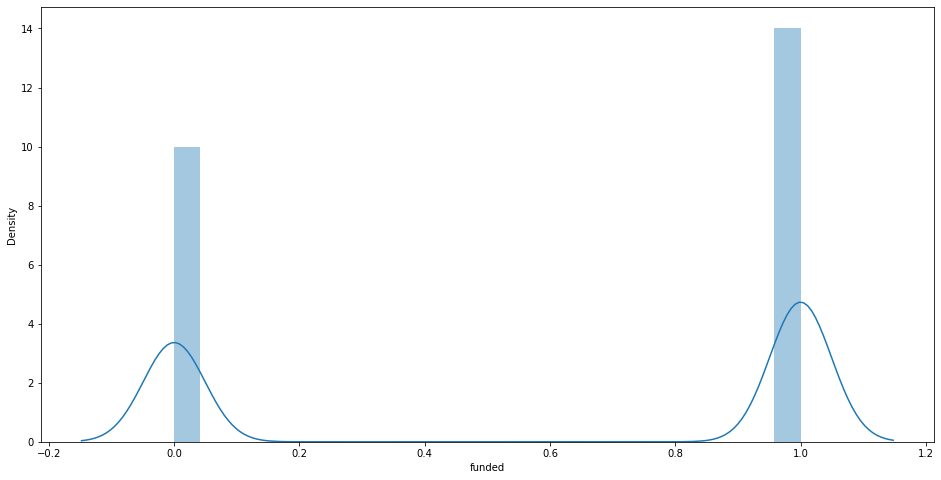

In [157]:
sns.distplot(ks_train['funded'])

<AxesSubplot:>

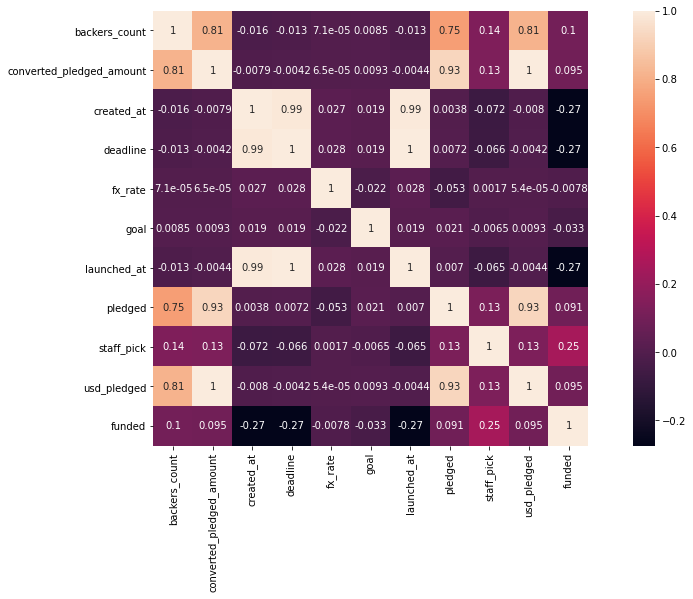

In [158]:
# cols = ['funded', 'staff_pick', 'country', 'subcategory', 'category' ]
corrmat = ks_train.corr()
sns.heatmap(corrmat, square=True, annot=True)

In [159]:
ks_train['subcategory'].value_counts()

web                2302
product design     1902
shorts             1698
documentary        1687
hardware           1641
                   ... 
letterpress          30
literary spaces      27
games                23
chiptune             17
taxidermy             6
Name: subcategory, Length: 158, dtype: int64

In [160]:
ks_train['country'].value_counts()

US    76716
GB     8015
CA     3511
AU     1793
DE      969
      ...  
XK        1
SO        1
DJ        1
CK        1
NE        1
Name: country, Length: 174, dtype: int64

In [161]:
ks_train['location'].value_counts()

Los Angeles, CA                   5213
New York, NY                      4722
London, UK                        2827
Chicago, IL                       2267
San Francisco, CA                 2065
                                  ... 
Skamania, WA                         1
Bondi, AU                            1
Saint Cloud Manor, Valrico, FL       1
Viola, WI                            1
Wheelersburg, OH                     1
Name: location, Length: 10273, dtype: int64

In [162]:
ks_train['funded'].value_counts()

True     58454
False    41546
Name: funded, dtype: int64

In [163]:
ks_train['category'].value_counts()

music           14169
film & video    13372
technology      10456
art             10346
publishing      10013
food             7674
games            5853
fashion          4457
comics           4120
design           3981
photography      3897
theater          3318
crafts           3313
journalism       2898
dance            2133
Name: category, dtype: int64

In [164]:
ks_train['created_at'].value_counts()

1308338176    3
1410471238    3
1404609625    3
1487261665    3
1361160257    2
             ..
1404782650    1
1489898109    1
1376082113    1
1364269365    1
1439665771    1
Name: created_at, Length: 95610, dtype: int64

Create 'createVSlaunch' feature which denotes the time between the creation and launch time

In [165]:
ks_train['createVSlaunch'] = ks_train['launched_at'] - ks_train['created_at']
print(ks_train['createVSlaunch'])

0        6988755
1        2058061
2         608845
3         649245
4        4429623
          ...   
99995    5282359
99996     142910
99997    4489866
99998    1391644
99999     435643
Name: createVSlaunch, Length: 100000, dtype: int64


In [166]:
cols = corrmat.nlargest(10, 'funded').index
print(cols)

Index(['funded', 'staff_pick', 'backers_count', 'usd_pledged',
       'converted_pledged_amount', 'pledged', 'fx_rate', 'goal', 'launched_at',
       'deadline'],
      dtype='object')


Conversion to real time

In [167]:
from __future__ import division
import datetime

# convert UNIX times to readable times and dates
time_list = []
for value in ks_train['created_at']:
    real_time = datetime.datetime.fromtimestamp(value)
    time_list.append(real_time)
    
ks_train['created_at_real'] = time_list

In [168]:
print(ks_train['created_at_real'])

0       2012-01-08 00:55:05
1       2012-03-05 06:41:24
2       2012-03-22 03:21:34
3       2012-03-21 16:07:31
4       2012-02-06 22:10:17
                ...        
99995   2012-09-26 18:44:53
99996   2013-04-02 23:44:59
99997   2013-04-16 04:18:14
99998   2013-06-25 18:16:40
99999   2014-04-27 13:12:50
Name: created_at_real, Length: 100000, dtype: datetime64[ns]


In [169]:
# convert UNIX times to readable times and dates
time_list2 = []
for value in ks_train['launched_at']:
    real_time = datetime.datetime.fromtimestamp(value)
    time_list2.append(real_time)
    
ks_train['launched_at_real'] = time_list2
print(ks_train['launched_at_real'])

0       2012-03-28 23:14:20
1       2012-03-29 03:22:25
2       2012-03-29 05:28:59
3       2012-03-29 05:28:16
4       2012-03-29 05:37:20
                ...        
99995   2012-11-26 21:04:12
99996   2013-04-04 15:26:49
99997   2013-06-07 03:29:20
99998   2013-07-11 20:50:44
99999   2014-05-02 14:13:33
Name: launched_at_real, Length: 100000, dtype: datetime64[ns]


In [170]:
# convert UNIX times to readable times and dates
time_list3 = []
for value in ks_train['deadline']:
    real_time = datetime.datetime.fromtimestamp(value)
    time_list3.append(real_time)
    
ks_train['deadline_real'] = time_list2
print(ks_train['deadline_real'])

0       2012-03-28 23:14:20
1       2012-03-29 03:22:25
2       2012-03-29 05:28:59
3       2012-03-29 05:28:16
4       2012-03-29 05:37:20
                ...        
99995   2012-11-26 21:04:12
99996   2013-04-04 15:26:49
99997   2013-06-07 03:29:20
99998   2013-07-11 20:50:44
99999   2014-05-02 14:13:33
Name: deadline_real, Length: 100000, dtype: datetime64[ns]


In [171]:
ks_train.info()
ks_train = ks_train.reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   project_id                100000 non-null  object        
 1   backers_count             100000 non-null  int64         
 2   blurb                     99998 non-null   object        
 3   category                  100000 non-null  object        
 4   converted_pledged_amount  100000 non-null  int64         
 5   country                   99997 non-null   object        
 6   created_at                100000 non-null  int64         
 7   currency                  100000 non-null  object        
 8   deadline                  100000 non-null  int64         
 9   fx_rate                   100000 non-null  float64       
 10  goal                      100000 non-null  float64       
 11  launched_at               100000 non-null  int64         
 12  nam

In [172]:
ks_train['residual'] = ks_train['pledged'] - ks_train['goal']
#print(ks_train['goal'])
#print(ks_train['pledged'])

successful = []
def success():
    for i in range(len(ks_train['residual'])):
        if ks_train['residual'][i] >= 0:
            value = 1
            successful.append(value)

        else:
            value = 0
            successful.append(value)
            
success()
ks_train['successful'] = successful
print(ks_train['successful'])

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: successful, Length: 100000, dtype: int64


In [173]:
ks_train['launchVSdeadline'] = ks_train['launched_at_real'] - ks_train['deadline_real']
print(ks_train['deadline_real'])
print(ks_train['launched_at_real'])
print(ks_train['launchVSdeadline'])

0       2012-03-28 23:14:20
1       2012-03-29 03:22:25
2       2012-03-29 05:28:59
3       2012-03-29 05:28:16
4       2012-03-29 05:37:20
                ...        
99995   2012-11-26 21:04:12
99996   2013-04-04 15:26:49
99997   2013-06-07 03:29:20
99998   2013-07-11 20:50:44
99999   2014-05-02 14:13:33
Name: deadline_real, Length: 100000, dtype: datetime64[ns]
0       2012-03-28 23:14:20
1       2012-03-29 03:22:25
2       2012-03-29 05:28:59
3       2012-03-29 05:28:16
4       2012-03-29 05:37:20
                ...        
99995   2012-11-26 21:04:12
99996   2013-04-04 15:26:49
99997   2013-06-07 03:29:20
99998   2013-07-11 20:50:44
99999   2014-05-02 14:13:33
Name: launched_at_real, Length: 100000, dtype: datetime64[ns]
0       0 days
1       0 days
2       0 days
3       0 days
4       0 days
         ...  
99995   0 days
99996   0 days
99997   0 days
99998   0 days
99999   0 days
Name: launchVSdeadline, Length: 100000, dtype: timedelta64[ns]


In [174]:
ks_train['createVSlaunch'] = ks_train['launched_at_real'] - ks_train['created_at_real']
print(ks_train['createVSlaunch'])

0       80 days 22:19:15
1       23 days 20:41:01
2        7 days 02:07:25
3        7 days 13:20:45
4       51 days 07:27:03
              ...       
99995   61 days 02:19:19
99996    1 days 15:41:50
99997   51 days 23:11:06
99998   16 days 02:34:04
99999    5 days 01:00:43
Name: createVSlaunch, Length: 100000, dtype: timedelta64[ns]


In [175]:
# Since Categorical variable 'Type' has only 2 values we will convert it into numeric (0 and 1) datatype.
ks_train['funded'] = ks_train['funded'].astype('category')
ks_train['fundedInt']= ks_train['funded'].cat.codes
print(ks_train['fundedInt'])

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: fundedInt, Length: 100000, dtype: int8


<AxesSubplot:xlabel='pledged', ylabel='category'>

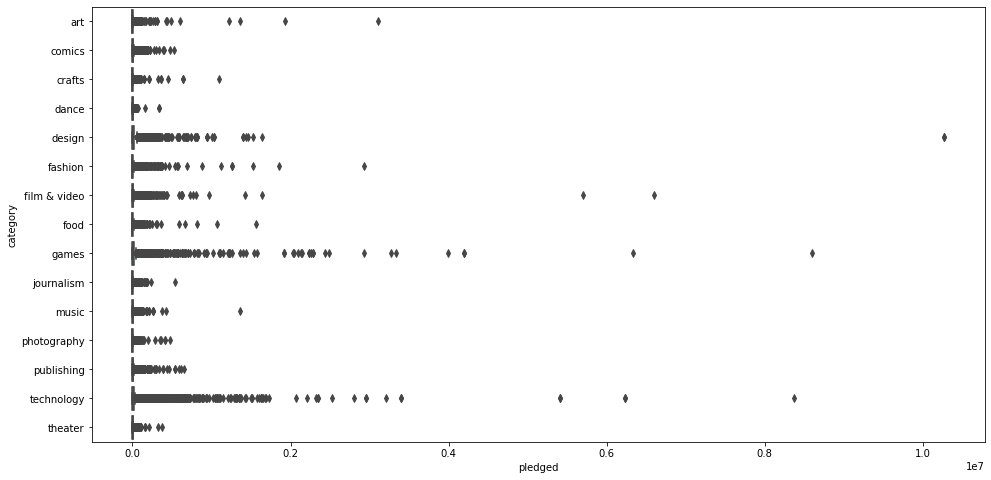

In [176]:
# Create a boxplot for your chosen variable
sns.boxplot(x = ks_train['pledged'], y = ks_train['category'])

Check for missing values

In [177]:
# Check how many entries are missing for the selected features
ks_train.isnull().sum()

index                       0
project_id                  0
backers_count               0
blurb                       2
category                    0
converted_pledged_amount    0
country                     3
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        1
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
createVSlaunch              0
created_at_real             0
launched_at_real            0
deadline_real               0
residual                    0
successful                  0
launchVSdeadline            0
fundedInt                   0
dtype: int64

In [178]:
#ks_train.dropna(axis=0, how='any', inplace=False)
ks_train.fillna(method='bfill', inplace= True)
ks_train.isnull().sum()

index                       0
project_id                  0
backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        0
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
createVSlaunch              0
created_at_real             0
launched_at_real            0
deadline_real               0
residual                    0
successful                  0
launchVSdeadline            0
fundedInt                   0
dtype: int64

In [179]:
features = ['backers_count','converted_pledged_amount', 'created_at']

X = ks_train[features]
y = ks_train['fundedInt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70%:30%

model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.5373

# Week 2: Transformation and feature derivation, plan modelling, or start first modelling

In [180]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split
model = GaussianNB()

Features

In [181]:
# Print the imported dataframe's column headers
print(ks_train.columns)

Index(['index', 'project_id', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'pledged',
       'staff_pick', 'usd_pledged', 'location', 'funded', 'subcategory',
       'project_url', 'reward_url', 'createVSlaunch', 'created_at_real',
       'launched_at_real', 'deadline_real', 'residual', 'successful',
       'launchVSdeadline', 'fundedInt'],
      dtype='object')


In [182]:
ks_train.isnull().sum()

index                       0
project_id                  0
backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        0
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
createVSlaunch              0
created_at_real             0
launched_at_real            0
deadline_real               0
residual                    0
successful                  0
launchVSdeadline            0
fundedInt                   0
dtype: int64

In [183]:
# checking format and type of features
print(ks_train['deadline_real'][:])     # Seems to have a number ID for the instance
print(type(ks_train['deadline_real'][0]))

0       2012-03-28 23:14:20
1       2012-03-29 03:22:25
2       2012-03-29 05:28:59
3       2012-03-29 05:28:16
4       2012-03-29 05:37:20
                ...        
99995   2012-11-26 21:04:12
99996   2013-04-04 15:26:49
99997   2013-06-07 03:29:20
99998   2013-07-11 20:50:44
99999   2014-05-02 14:13:33
Name: deadline_real, Length: 100000, dtype: datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [184]:
# checking format and type of features
print(ks_train['country'][:])     # Seems to have a number ID for the instance
print(type(ks_train['country'][0]))

0        US
1        US
2        US
3        GB
4        US
         ..
99995    US
99996    US
99997    US
99998    US
99999    GB
Name: country, Length: 100000, dtype: object
<class 'str'>


In [185]:
# First derived feature: Number of days between the created_at and launched_at date

all_full_days = []
time_in_days = (ks_train['launched_at'] - ks_train['created_at'])/86400 # Every day is 86400 seconds

for item in time_in_days:
    full_days = math.ceil(item)
    all_full_days.append(full_days)

ks_train['cVSl_full_days'] = all_full_days
print(ks_train['cVSl_full_days'])

0        81
1        24
2         8
3         8
4        52
         ..
99995    62
99996     2
99997    52
99998    17
99999     6
Name: cVSl_full_days, Length: 100000, dtype: int64


In [186]:
# First derived feature: Number of days between the created_at and launched_at date
# Test set

all_full_days = []
time_in_days = (ks_test['launched_at'] - ks_test['created_at'])/86400 # Every day is 86400 seconds

for item in time_in_days:
    full_days = math.ceil(item)
    all_full_days.append(full_days)

ks_test['cVSl_full_days'] = all_full_days
print(ks_test['cVSl_full_days'])

0        26
1         5
2         6
3        64
4         4
         ..
78060    28
78061     8
78062    32
78063    11
78064     5
Name: cVSl_full_days, Length: 78065, dtype: int64


In [187]:
# Second derived feature: boolean (1 or 0) if deadline was reached or not 
passed_days = []
time_in_days = (ks_train['launched_at'] - ks_train['deadline'])/86400 # Every day is 86400 seconds

for item in time_in_days:
    full_days = math.ceil(item)
    if full_days < 0:
        value = 1
        passed_days.append(value)
    elif full_days >= 0: 
        value = 0
        passed_days.append(value)

ks_train['reached_deadline'] = passed_days
print(ks_train['reached_deadline'])

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: reached_deadline, Length: 100000, dtype: int64


In [188]:
# Second derived feature: boolean (1 or 0) if deadline was reached or not 
# test set

passed_days = []
time_in_days = (ks_test['launched_at'] - ks_test['deadline'])/86400 # Every day is 86400 seconds

for item in time_in_days:
    full_days = math.ceil(item)
    if full_days < 0:
        value = 1
        passed_days.append(value)
    elif full_days >= 0: 
        value = 0
        passed_days.append(value)

ks_test['reached_deadline'] = passed_days
print(ks_test['reached_deadline'])

0        1
1        1
2        1
3        1
4        1
        ..
78060    1
78061    1
78062    1
78063    1
78064    1
Name: reached_deadline, Length: 78065, dtype: int64


In [189]:
# Third derived feature: the goal in US dollars, based on the fx rate and goal
goal_in_USD = []

def goal():
    for i in range(len(ks_train['goal'])):
        value = ks_train['goal'][i]*ks_train['fx_rate'][i]
        goal_in_USD.append(value)
            
goal()
ks_train['goal_in_USD'] = goal_in_USD
print('a', ks_train['goal_in_USD'])

a 0         2800.000000
1         4500.000000
2         5000.000000
3         6500.000000
4        15000.000000
             ...     
99995     7000.000000
99996    25000.000000
99997     5500.000000
99998    25000.000000
99999     3473.857825
Name: goal_in_USD, Length: 100000, dtype: float64


In [190]:
# Third derived feature: the goal in US dollars, based on the fx rate and goal
# test set

goal_in_USD = []

def goal():
    for i in range(len(ks_test['goal'])):
        value = ks_test['goal'][i]*ks_test['fx_rate'][i]
        goal_in_USD.append(value)
            
goal()
ks_test['goal_in_USD'] = goal_in_USD
print('a', ks_test['goal_in_USD'])

a 0          3900.0
1           750.0
2          1000.0
3         15000.0
4          4200.0
           ...   
78060      7900.0
78061    116000.0
78062      8000.0
78063     20000.0
78064     15000.0
Name: goal_in_USD, Length: 78065, dtype: float64


# Week 3: Training and testing the models

Independently fit a gaussian NB model on the continuous part of the data and a multinomial NB model on the categorical part. Then transform all the dataset by taking the class assignment probabilities (with predict_proba method) as new features: np.hstack((multinomial_probas, gaussian_probas)) and then refit a new model (e.g. a new gaussian NB) on the new features.

In [191]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OrdinalEncoder

## Categorizing the features

In [192]:
# Print the imported dataframe's column headers
print(ks_test.columns)

Index(['project_id', 'blurb', 'category', 'country', 'created_at', 'currency',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'name', 'staff_pick',
       'location', 'subcategory', 'project_url', 'reward_url',
       'cVSl_full_days', 'reached_deadline', 'goal_in_USD'],
      dtype='object')


In [193]:
for item in range(len(ks_test.columns)):
    print(ks_test.columns[item])

for feature in ks_test.columns:
    print(type(ks_test[feature][0]))

project_id
blurb
category
country
created_at
currency
deadline
fx_rate
goal
launched_at
name
staff_pick
location
subcategory
project_url
reward_url
cVSl_full_days
reached_deadline
goal_in_USD
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.bool_'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>


In [194]:
categorical_features = []
numerical_features = []

for feature in ks_test.columns:
    if isinstance(ks_test[feature][0], (np.int64,np.float64))  or isinstance(ks_test[feature][0], np.bool_):
        numerical_features.append(feature)
    elif type(ks_test[feature][0]) == str:
        categorical_features.append(feature)
        
print("The numerical features are: ", numerical_features)
print("The categorical features are: ", categorical_features)

The numerical features are:  ['created_at', 'deadline', 'fx_rate', 'goal', 'launched_at', 'staff_pick', 'cVSl_full_days', 'reached_deadline', 'goal_in_USD']
The categorical features are:  ['project_id', 'blurb', 'category', 'country', 'currency', 'name', 'location', 'subcategory', 'project_url', 'reward_url']


## Gaussian Naive Bayes for Numerical Data

Independently fit a gaussian NB model on the continuous part of the data and a multinomial NB model on the categorical part. Then transform all the dataset by taking the class assignment probabilities (with predict_proba method) as new features: np.hstack((multinomial_probas, gaussian_probas)) and then refit a new model (e.g. a new gaussian NB) on the new features.

In [210]:
guassian_model = GaussianNB()    
label = ['fundedInt'] 

G_X_train = ks_train[numerical_features]
G_y_train = ks_train[label]
guassian_model.fit(G_X_train, G_y_train)
scores = cross_val_score(guassian_model, G_X_train, G_y_train, cv=6, scoring="accuracy")
print("Accuracy score on Cross-Validation: %0.2f (+- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)
print("Model score Gaussain Naive Bayes: %0.2f" % guassian_model.score(G_X_train,G_y_train))
print("The predictions whether it will be funded per item: ", guassian_model.predict(ks_test[numerical_features]))

#          Accuracy CV  -- Model score -- Individual Scores
#k=2     0.61 (+- 0.00) -- 0.61        -- [0.60444 0.60748]
#k=3     0.61 (+- 0.01) -- 0.61        -- [0.59950801 0.61089611 0.60747607]
#k=4     0.61 (+- 0.02) -- 0.61        -- [0.59468 0.62048 0.59516 0.61652]
#k=5     0.61 (+- 0.02) -- 0.61        -- [0.59585 0.61225 0.6113  0.59045 0.6239 ]
#k=6     0.61 (+- 0.03) -- 0.61        -- [0.59248815 0.60760785 0.62110758 0.59716806 0.59210368 0.6274451 ]
#k=7     0.61 (+- 0.03) -- 0.61        -- [0.59295814 0.60177796 0.61899762 0.61192776 0.59211816 0.59775989 0.62744137]
#k=8     0.61 (+- 0.03) -- 0.61        -- [0.59352 0.59552 0.62064 0.6192  0.5992  0.59    0.6036  0.62624]
#k=9     0.61 (+- 0.02) -- 0.61        -- [0.59404248 0.59571596 0.61110611 0.6198362  0.61218612 0.59328593 0.59067591 0.6096661  0.62406624]
#k=10    0.61 (+- 0.03) -- 0.61        -- [0.5942 0.5979 0.6025 0.6208 0.6202 0.5986 0.5918 0.5897 0.6203 0.6231]

Accuracy score on Cross-Validation: 0.61 (+- 0.03)
[0.59248815 0.60760785 0.62110758 0.59716806 0.59210368 0.6274451 ]
Model score Gaussain Naive Bayes: 0.61
The predictions whether it will be funded per item:  [1 1 1 ... 1 1 1]


A tab-separated file containing two columns. The first column must contain the project IDs from the test data (KS_100000 through KS_178064). The second column must contain a predicted probability that project was funded, where 1 and 0 represent certainty the project was and was not funded, respectively.

If your model does not predict probabilities, but only booleans (True/False), enter those instead. Consider using the to_csv method from Pandas, e.g.:

In [212]:
# Run this cell to save the predictions of each item in the test set on you computer.
# These predictions are for the Gaussian_model only, for the numerical features.
ks_test['prediction'] = guassian_model.predict(ks_test[numerical_features])
ks_test.to_csv('GaussianNB_predictions.tsv', columns=['project_id','prediction'])

## Categorical Naive Bayes for Categorical Data

## One-Hot Encoding Approach

In [213]:
cat_features = ['country']
ks_train['located_in_country'] = ks_train['country']

for feature in cat_features:
    for i in range(len(ks_train[feature])):
        if ks_train[feature][i] == '?': 
            print(i, ks_train[feature][i])
            ks_train['located_in_country'][i] = 'Unknown'
        elif ks_train[feature][i] != 'US':
            ks_train['located_in_country'][i] = 'Non-US'

print(ks_train['located_in_country'])

843 ?
847 ?
851 ?
852 ?
853 ?
856 ?
858 ?
862 ?
868 ?
871 ?
882 ?
883 ?
885 ?
888 ?
890 ?
900 ?
910 ?
920 ?
921 ?
930 ?
938 ?
941 ?
945 ?
946 ?
947 ?
950 ?
951 ?
966 ?
967 ?
978 ?
992 ?
993 ?
1468 ?
1474 ?
1475 ?
1476 ?
1684 ?
1685 ?
1690 ?
2115 ?
2123 ?
2125 ?
2126 ?
2718 ?
2721 ?
2727 ?
2729 ?
2731 ?
2732 ?
3881 ?
3882 ?
6337 ?
6344 ?
6348 ?
6355 ?
6359 ?
6545 ?
6552 ?
6553 ?
6557 ?
6558 ?
6562 ?
6563 ?
6564 ?
7154 ?
7155 ?
8281 ?
8288 ?
8296 ?
8842 ?
8847 ?
8849 ?
8853 ?
8860 ?
8861 ?
9326 ?
10451 ?
10452 ?
10462 ?
12129 ?
12140 ?
12143 ?
12144 ?
15281 ?
18578 ?
18579 ?
18581 ?
18590 ?
18592 ?
18595 ?
18596 ?
19120 ?
20981 ?
20985 ?
20992 ?
20993 ?
23840 ?
23845 ?
23848 ?
24396 ?
24400 ?
24412 ?
26494 ?
26496 ?
26500 ?
26516 ?
26517 ?
26528 ?
26533 ?
26537 ?
26541 ?
26542 ?
26543 ?
26551 ?
26552 ?
26553 ?
26555 ?
26562 ?
26563 ?
26564 ?
26566 ?
26572 ?
26580 ?
26591 ?
26592 ?
26594 ?
26597 ?
26598 ?
26600 ?
26602 ?
26603 ?
26604 ?
26607 ?
26618 ?
26619 ?
26623 ?
26624 ?
26630 ?
2663

In [214]:
for feature in ks_train.columns:
    print(feature + " = ", ks_train[feature][98292]) # index 1857 is faulty

index =  98292
project_id =  KS_098292
backers_count =  37
blurb =  TWEED TheaterWorks is raising money to develop a new project called CANNED HAM with Tom Judson (aka Gus Mattox).

category =  theater
converted_pledged_amount =  3850
country =  ?
created_at =  1254146721
currency =  USD
deadline =  1256918400
fx_rate =  1.0
goal =  3500.0
launched_at =  1254147624
name =  CANNED HAM Starring Tom Judson
pledged =  3850.0
staff_pick =  True
usd_pledged =  3850.0
location =  ?
funded =  True
subcategory =  theater
project_url =  https://www.kickstarter.com/projects/tweed/canned-ham-starring-tom-judson
reward_url =  https://www.kickstarter.com/projects/tweed/canned-ham-starring-tom-judson/rewards
createVSlaunch =  0 days 00:15:03
created_at_real =  2009-09-28 16:05:21
launched_at_real =  2009-09-28 16:20:24
deadline_real =  2009-09-28 16:20:24
residual =  350.0
successful =  1
launchVSdeadline =  0 days 00:00:00
fundedInt =  1
cVSl_full_days =  1
reached_deadline =  1
goal_in_USD =  3500.

In [215]:
#features_of_interest = ['category', 'located_in_country', 'currency', 'staff_pick']
features_of_interest = ['category', 'located_in_country', 'currency', 'subcategory']

one_hot = pd.get_dummies(ks_train[features_of_interest])
ks_train = pd.concat([ks_train, one_hot], axis=1)
print(ks_train)

       index project_id  backers_count  \
0          0  KS_000000             80   
1          1  KS_000001             82   
2          2  KS_000002             21   
3          3  KS_000003             37   
4          4  KS_000004            153   
...      ...        ...            ...   
99995  99995  KS_099995            104   
99996  99996  KS_099996            307   
99997  99997  KS_099997            143   
99998  99998  KS_099998            329   
99999  99999  KS_099999            145   

                                                   blurb category  \
0      I will be an artist-in-residence at Elsewhere ...      art   
1      1000 Artists is a public art-making installati...      art   
2      The Sequel to ‘My Favorite Machine”, "MyPhoneH...      art   
3      A film exploring the role and value of art edu...      art   
4      We need to build a kitchen for Habitable Space...      art   
...                                                  ...      ...   
99995  Make 

In [216]:
train_df = pd.DataFrame()
train_df = pd.concat([train_df, one_hot], axis=1)

In [217]:
one_hot_features = []
for feature in train_df.columns:
    one_hot_features.append(feature)

print(one_hot_features)

['category_art', 'category_comics', 'category_crafts', 'category_dance', 'category_design', 'category_fashion', 'category_film & video', 'category_food', 'category_games', 'category_journalism', 'category_music', 'category_photography', 'category_publishing', 'category_technology', 'category_theater', 'located_in_country_Non-US', 'located_in_country_US', 'located_in_country_Unknown', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_HKD', 'currency_JPY', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_SGD', 'currency_USD', 'subcategory_3d printing', 'subcategory_academic', 'subcategory_accessories', 'subcategory_action', 'subcategory_animals', 'subcategory_animation', 'subcategory_anthologies', 'subcategory_apparel', 'subcategory_apps', 'subcategory_architecture', 'subcategory_art', 'subcategory_art books', 'subcategory_audio', 'subcategory_bacon', 'subcategory_blues', 'subcategory_calendars', 'subcategor

In [218]:
categorical_model = CategoricalNB()

label = ['fundedInt'] 
C_X_train = ks_train[one_hot_features] #ks_train[features_of_interest]
C_y_train = ks_train[label]
categorical_model.fit(C_X_train, C_y_train)

print("Model score Categorical Naive Bayes: %0.2f" % categorical_model.score(C_X_train,C_y_train))

Model score Categorical Naive Bayes: 0.72


In [219]:
#ks_test = pd.read_csv('KS_test_data.csv', delimiter = ';')
cat_features = ['country']
ks_test['located_in_country'] = ks_test['country']

for feature in cat_features:
    for i in range(len(ks_test[feature])):
        if ks_test[feature][i] == '?': 
            print(i, ks_test[feature][i])
            ks_test['located_in_country'][i] = 'Unknown'
        elif ks_test[feature][i] != 'US':
            ks_test['located_in_country'][i] = 'Non-US'

print(ks_test['located_in_country'])

630 ?
640 ?
646 ?
648 ?
649 ?
650 ?
656 ?
663 ?
670 ?
673 ?
685 ?
698 ?
700 ?
710 ?
719 ?
729 ?
731 ?
732 ?
743 ?
749 ?
750 ?
752 ?
753 ?
754 ?
1119 ?
1120 ?
1577 ?
1578 ?
1580 ?
2037 ?
2048 ?
2831 ?
2983 ?
4506 ?
4880 ?
4881 ?
4886 ?
4887 ?
4888 ?
4896 ?
5052 ?
5057 ?
5058 ?
5060 ?
5063 ?
5064 ?
5504 ?
5506 ?
5516 ?
5518 ?
5899 ?
6471 ?
6472 ?
6480 ?
6487 ?
6489 ?
6880 ?
6895 ?
8147 ?
8161 ?
9481 ?
9482 ?
9495 ?
9499 ?
9500 ?
9506 ?
9508 ?
9514 ?
9522 ?
11249 ?
11251 ?
11252 ?
11254 ?
11256 ?
11258 ?
12057 ?
13066 ?
14691 ?
15052 ?
15057 ?
16290 ?
16579 ?
16580 ?
16590 ?
17526 ?
18859 ?
18863 ?
19308 ?
20290 ?
20838 ?
20860 ?
20872 ?
20873 ?
20874 ?
20875 ?
20876 ?
20881 ?
20888 ?
20901 ?
20902 ?
20903 ?
20911 ?
20917 ?
20923 ?
20931 ?
20933 ?
20934 ?
20939 ?
20940 ?
20947 ?
20949 ?
20959 ?
20962 ?
20965 ?
20967 ?
20969 ?
20974 ?
20984 ?
20996 ?
21001 ?
21007 ?
21016 ?
21017 ?
21018 ?
21019 ?
21021 ?
21031 ?
21036 ?
21043 ?
21047 ?
21051 ?
21057 ?
21061 ?
22491 ?
22655 ?
23374 ?
23379

In [220]:
one_hot = pd.get_dummies(ks_test[features_of_interest])
ks_test = pd.concat([ks_test, one_hot], axis=1)
print(ks_test)

      project_id                                              blurb category  \
0      KS_100000  We are looking to bring a Visiting Sculptor fr...      art   
1      KS_100001  Surrealistic oil paintings capturing the metam...      art   
2      KS_100002  P.M.A.F.T.W. my upcoming solo show June 2012 a...      art   
3      KS_100003  A series of images about the art/artist and lo...      art   
4      KS_100004  Become a part of the first crowd-funded commun...      art   
...          ...                                                ...      ...   
78060  KS_178060  Your opportunity to help improvMANIA open Chan...  theater   
78061  KS_178061  Dad's Garage Theatre Company needs your help b...  theater   
78062  KS_178062  A new performance space in Seattle. A place fo...  theater   
78063  KS_178063  After 22 yrs downstairs we are "getting out of...  theater   
78064  KS_178064  We plan to transition from 35mm to the new dig...  theater   

      country  created_at currency    d

In [221]:
test_df = pd.DataFrame()
test_df = pd.concat([test_df, one_hot], axis=1)

In [222]:
test_one_hot_features = []
for feature in test_df.columns:
    test_one_hot_features.append(feature)

print(test_one_hot_features)

['category_art', 'category_comics', 'category_crafts', 'category_dance', 'category_design', 'category_fashion', 'category_film & video', 'category_food', 'category_games', 'category_journalism', 'category_music', 'category_photography', 'category_publishing', 'category_technology', 'category_theater', 'located_in_country_Non-US', 'located_in_country_US', 'located_in_country_Unknown', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_HKD', 'currency_JPY', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_SGD', 'currency_USD', 'subcategory_3d printing', 'subcategory_academic', 'subcategory_accessories', 'subcategory_action', 'subcategory_animals', 'subcategory_animation', 'subcategory_anthologies', 'subcategory_apparel', 'subcategory_apps', 'subcategory_architecture', 'subcategory_art', 'subcategory_art books', 'subcategory_audio', 'subcategory_bacon', 'subcategory_blues', 'subcategory_calendars', 'subcategor

In [223]:
print("The predictions whether it will be funded per item: ", categorical_model.predict(ks_test[test_one_hot_features]))

The predictions whether it will be funded per item:  [1 1 1 ... 1 1 1]


In [224]:
# Run this cell to save the predictions of each item in the test set on you computer.
# These predictions are for the Multinomial_model only, for the categorical features.
ks_test['prediction'] = categorical_model.predict(ks_test[test_one_hot_features])
ks_test.to_csv('CategoricalNB_predictions.tsv', columns=['project_id','prediction'])

## Merge the two models together for final prediction

In [225]:
# Create predictions for both models and stack them together 

categorical_probas = categorical_model.predict_proba(ks_train[one_hot_features])
gaussian_probas = guassian_model.predict_proba(ks_train[numerical_features])

new_features = np.hstack((categorical_probas, gaussian_probas))

print(categorical_probas)
print(gaussian_probas)
print(new_features)

[[0.46996706 0.53003294]
 [0.25381182 0.74618818]
 [0.4389597  0.5610403 ]
 ...
 [0.27669222 0.72330778]
 [0.27669222 0.72330778]
 [0.69558526 0.30441474]]
[[1.12319968e-05 9.99988768e-01]
 [1.27886154e-05 9.99987211e-01]
 [1.36779243e-05 9.99986322e-01]
 ...
 [1.08969110e-04 9.99891031e-01]
 [1.61094990e-04 9.99838905e-01]
 [3.90995426e-04 9.99609005e-01]]
[[4.69967059e-01 5.30032941e-01 1.12319968e-05 9.99988768e-01]
 [2.53811823e-01 7.46188177e-01 1.27886154e-05 9.99987211e-01]
 [4.38959696e-01 5.61040304e-01 1.36779243e-05 9.99986322e-01]
 ...
 [2.76692222e-01 7.23307778e-01 1.08969110e-04 9.99891031e-01]
 [2.76692222e-01 7.23307778e-01 1.61094990e-04 9.99838905e-01]
 [6.95585257e-01 3.04414743e-01 3.90995426e-04 9.99609005e-01]]


In [226]:
# Fit new Gaussian NB model to the stack 
gaussian_comb_model = GaussianNB()  

X3_train = new_features
y3_train = ks_train[label]
gaussian_comb_model.fit(X3_train, y3_train)

print("Model score Combination Naive Bayes: %0.2f" % gaussian_comb_model.score(X3_train,y3_train))

Model score Combination Naive Bayes: 0.70


In [227]:
categorical_probas_test = categorical_model.predict_proba(ks_test[one_hot_features])
gaussian_probas_test = guassian_model.predict_proba(ks_test[numerical_features])

new_features_test = np.hstack((categorical_probas_test, gaussian_probas_test))

# print(categorical_probas_test)
# print(gaussian_probas_test)

print(new_features_test)

[[2.13094136e-03 9.97869059e-01 1.23742898e-05 9.99987626e-01]
 [3.79732792e-01 6.20267208e-01 1.33204874e-05 9.99986680e-01]
 [3.79732792e-01 6.20267208e-01 1.28714960e-05 9.99987129e-01]
 ...
 [2.76692222e-01 7.23307778e-01 9.21021168e-05 9.99907898e-01]
 [2.76692222e-01 7.23307778e-01 2.49263476e-04 9.99750737e-01]
 [2.76692222e-01 7.23307778e-01 3.83439928e-04 9.99616560e-01]]


In [228]:
df = pd.DataFrame(new_features_test)
print(df[0])

ks_test['stack_model_probabilities_0'] = df[0]
ks_test['stack_model_probabilities_1'] = df[1]
ks_test['stack_model_probabilities_2'] = df[2]
ks_test['stack_model_probabilities_3'] = df[3]

test_features = ['stack_model_probabilities_0', 'stack_model_probabilities_1', 'stack_model_probabilities_2', 
                'stack_model_probabilities_3']

0        0.002131
1        0.379733
2        0.379733
3        0.253812
4        0.545468
           ...   
78060    0.276692
78061    0.276692
78062    0.276692
78063    0.276692
78064    0.276692
Name: 0, Length: 78065, dtype: float64


In [244]:
scores = cross_val_score(gaussian_comb_model, X3_train, y3_train, cv=9, scoring="accuracy")
print("Accuracy score on Cross-Validation: %0.2f (+- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)
print("Model score Gaussain Naive Bayes: %0.2f" % gaussian_comb_model.score(X3_train,y3_train))
print("The predictions whether it will be funded per item: ", gaussian_comb_model.predict(ks_test[test_features]))

#          Accuracy CV  -- Model score -- Individual Scores
#k=2     0.69 (+- 0.01) -- 0.70        -- [0.69164 0.68092]
#k=3     0.69 (+- 0.07) -- 0.70        -- [0.64606708 0.73629736 0.69837698]
#k=4     0.69 (+- 0.07) -- 0.70        -- [0.64404 0.73468 0.66764 0.7124 ]
#k=5     0.70 (+- 0.11) -- 0.70        -- [0.62575 0.6729  0.77615 0.6591  0.743  ]
#k=6     0.69 (+- 0.11) -- 0.70        -- [0.61888762 0.6649067  0.76714466 0.67882642 0.64658586 0.74954998]
#k=7     0.69 (+- 0.08) -- 0.70        -- [0.61458771 0.68402632 0.70698586 0.74947501 0.68850623 0.69359468 0.72586629]
#k=8     0.69 (+- 0.12) -- 0.70        -- [0.61256 0.67216 0.64032 0.81192 0.73832 0.6536  0.72088 0.70216]
#k=9     0.70 (+- 0.11) -- 0.70        -- [0.61402088 0.6399064  0.67185672 0.79632796 0.70929709 0.73458735 0.63522635 0.74835748 0.70947709]
#k=10    0.69 (+- 0.12) -- 0.70        -- [0.6078 0.6432 0.6845 0.6585 0.8224 0.7154 0.6819 0.6372 0.7632 0.722 ]

Accuracy score on Cross-Validation: 0.70 (+- 0.11)
[0.61402088 0.6399064  0.67185672 0.79632796 0.70929709 0.73458735
 0.63522635 0.74835748 0.70947709]
Model score Gaussain Naive Bayes: 0.70
The predictions whether it will be funded per item:  [1 1 1 ... 1 1 1]


In [245]:
ks_test['prediction'] = gaussian_comb_model.predict(ks_test[test_features])
ks_test.to_csv('Gaussian_Combined_predictions.tsv', columns=['project_id','prediction'])

# Random Forest (Second chosen model)

In [246]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

from sklearn.feature_selection import SelectFromModel

In [247]:
# All features of interest we want to check for the model
all_features_of_interest = []

for feature in test_one_hot_features:
    all_features_of_interest.append(feature)
for feature in numerical_features:
    all_features_of_interest.append(feature) 

# add derived features to the features of interest 
all_features_of_interest.extend(['cVSl_full_days', 'reached_deadline', 'goal_in_USD'])
print(all_features_of_interest)
print(len(all_features_of_interest))

['category_art', 'category_comics', 'category_crafts', 'category_dance', 'category_design', 'category_fashion', 'category_film & video', 'category_food', 'category_games', 'category_journalism', 'category_music', 'category_photography', 'category_publishing', 'category_technology', 'category_theater', 'located_in_country_Non-US', 'located_in_country_US', 'located_in_country_Unknown', 'currency_AUD', 'currency_CAD', 'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP', 'currency_HKD', 'currency_JPY', 'currency_MXN', 'currency_NOK', 'currency_NZD', 'currency_SEK', 'currency_SGD', 'currency_USD', 'subcategory_3d printing', 'subcategory_academic', 'subcategory_accessories', 'subcategory_action', 'subcategory_animals', 'subcategory_animation', 'subcategory_anthologies', 'subcategory_apparel', 'subcategory_apps', 'subcategory_architecture', 'subcategory_art', 'subcategory_art books', 'subcategory_audio', 'subcategory_bacon', 'subcategory_blues', 'subcategory_calendars', 'subcategor

In [248]:
# use select from model to decide which features are the most important for the RF model 
X_select_train = ks_train[all_features_of_interest]
y_select_train = ks_train[label]

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_select_train, y_select_train)

sel.get_support()

array([ True, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,

In [249]:
print(len(sel.get_support()))

202


In [250]:
sel.get_support(indices=True)

array([  0,   7,  10,  13,  37,  51,  62,  99, 119, 126, 179, 184, 190,
       191, 192, 193, 194, 195, 196, 198, 199, 201], dtype=int64)

In [251]:
selected_feat= X_select_train.columns[(sel.get_support())]
len(selected_feat)

22

In [252]:
# Print the features that were the most important for the model 
print(selected_feat)

Index(['category_art', 'category_food', 'category_music',
       'category_technology', 'subcategory_animation',
       'subcategory_children's books', 'subcategory_country & folk',
       'subcategory_hip-hop', 'subcategory_mobile games',
       'subcategory_nonfiction', 'subcategory_video games',
       'subcategory_webseries', 'created_at', 'deadline', 'fx_rate', 'goal',
       'launched_at', 'staff_pick', 'cVSl_full_days', 'goal_in_USD',
       'cVSl_full_days', 'goal_in_USD'],
      dtype='object')


In [253]:
forest_features = ['staff_pick', 'category_art', 'category_food',
       'category_technology', 'subcategory_animation',
       "subcategory_children's books", 'subcategory_country & folk',
       'subcategory_hip-hop', 'subcategory_mobile games',
       'subcategory_nonfiction', 'subcategory_product design',
       'subcategory_video games', 'subcategory_webseries', 'created_at',
       'deadline', 'fx_rate', 'goal', 'launched_at', 'cVSl_full_days',
       'goal_in_USD']

In [254]:
X_forest = ks_train[forest_features]
y_forest = ks_train[label]

In [79]:
# Test out base model for the RF to compare performance with, hyperparameters used: 
    # {'bootstrap': True,
    #  'max_depth': None,
    #  'max_features': 'auto',
    #  'min_samples_leaf': 1,
    #  'min_samples_split': 2,
    #  'n_estimators': 200}
    
# Create Random Forest classifer object
# base_model = RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=4,
#                        min_samples_split=5, n_estimators=400, bootstrap = True)

# # Train Random Forest Classifer
# base_model.fit(X_forest,y_forest)

# # Print model score for the Base model 
# print("Model score Random Forest: %0.2f" % base_model.score(X_forest, y_forest))

In [80]:
# (Don't run this, this is just added to the script so you can see how the random search is done)
# random_grid = {
#    'bootstrap': [True],
#    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#    'max_features': ['auto', 'log2', None], 
#    'min_samples_leaf': [1,2,4],
#    'min_samples_split': [2, 5, 10], 
#    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# }
# # Create a based model
# rf = RandomForestClassifier()

In [81]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_forest, y_forest)
# # Show best parameters for the random search, use these for a more directed grid search
# rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 182.4min finished


{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

In [85]:
# Evaluate performance of random search model 
# best_random = rf_random.best_estimator_
# print(best_random)
# print("Model score Random Forest: %0.2f" % rf_random.score(X_forest, y_forest))

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=1000)
Model score Random Forest: 0.82


In [ ]:
# first random search(10 iterations): score 0.81 
    # {'n_estimators': 200,
    #  'min_samples_split': 2,
    #  'min_samples_leaf': 4,
    #  'max_features': 'auto',
    #  'max_depth': 20,
    #  'bootstrap': True}
    
#Second random search (10 iterations): score 0.85
    # {'n_estimators': 1000,
    #  'min_samples_split': 5,
    #  'min_samples_leaf': 4,
    #  'max_features': 'auto',
    #  'max_depth': 30,
    #  'bootstrap': True}
    
    
#Third random search (100 iterations): score 0.85
    # {'n_estimators': 1800,
    #  'min_samples_split': 5,
    #  'min_samples_leaf': 4,
    #  'max_features': 'auto',
    #  'max_depth': 30,
    #  'bootstrap': True}

#Fourth random search (10 iterations): score 0.84
    # {'n_estimators': 200,
    #  'min_samples_split': 5,
    #  'min_samples_leaf': 2,
    #  'max_features': None,
    #  'max_depth': 20,
    #  'bootstrap': True}
    
#Fifth random search (10 iterations): score 0.85
    # {'n_estimators': 400,
    #  'min_samples_split': 5,
    #  'min_samples_leaf': 4,
    #  'max_features': 'auto',
    #  'max_depth': 30,
    #  'bootstrap': True}
    
# Sixth random search(50 iterations): score 0.82
    # {'n_estimators': 1000,
    #  'min_samples_split': 10,
    #  'min_samples_leaf': 4,
    #  'max_features': 'auto',
    #  'max_depth': 20,
    #  'bootstrap': True}

In [92]:
# Create the parameter grid based on the results of random search 
# (Don't run this, this is just added to the script so you can see how the grid search is done)
param_grid = {
   'bootstrap': [True],
   'max_depth': [20, 30],
   'max_features': ['auto'], 
   'min_samples_leaf': [2, 3, 4],
   'min_samples_split': [3, 4, 5], 
   'n_estimators': [200, 400, 1000, 1800]
}
# Create a based model
rf2 = RandomForestClassifier()

In [93]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_forest, y_forest)
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 45.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 70.4min finished


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 400}

In [255]:
# Create Random Forest classifer object and use hyperparameters from the best grid search 
clf = RandomForestClassifier(max_depth=20, max_features='auto', min_samples_leaf=4,
                             min_samples_split=3, n_estimators=400, bootstrap = True)

# Train Random Forest Classifer
clf.fit(X_forest,y_forest)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=3,
                       n_estimators=400)

In [265]:
# Use cross validation to test the accuracy and also check general accuracy score
scores_forest = cross_val_score(clf, X_forest, y_forest, scoring="accuracy", cv=6)
print("Accuracy score on Cross-Validation: %0.2f (+- %0.2f)" % (scores_forest.mean(), scores_forest.std() * 2))

print(scores_forest)
print("Model score Random Forest: %0.2f" % clf.score(X_forest, y_forest))

#          Accuracy CV  -- Model score -- Individual Scores
#k=2     0.74 (+- 0.01) -- 0.83        -- [0.74424 0.73754]
#k=3     0.74 (+- 0.02) -- 0.83        -- [0.72850543 0.75576756 0.74214742]
#k=4     0.74 (+- 0.03) -- 0.83        -- [0.726   0.76664 0.7272  0.75048]
#k=5     0.74 (+- 0.05) -- 0.83        -- [0.7064  0.7539  0.7576  0.7168  0.76495]
#k=6     0.75 (+- 0.06) -- 0.83        -- [0.69958601 0.76156477 0.78634427 0.73294534 0.72452898 0.77487099]
#k=7     0.73 (+- 0.06) -- 0.83        -- [0.69249615 0.76200476 0.749965   0.71685566 0.71902562 0.76317816 0.69366468]
#k=8     0.74 (+- 0.09) -- 0.83        -- [0.68664 0.77408 0.7344  0.81536 0.7384  0.72624 0.76536 0.66112]
#k=9     0.72 (+- 0.11) -- 0.83        -- [0.6762959  0.74871749 0.76338763 0.77310773 0.7295473  0.72360724 0.73359734 0.73530735 0.58752588]
#k=10    0.72 (+- 0.08) -- 0.83        -- [0.6515 0.739  0.7463 0.7253 0.7462 0.7485 0.6891 0.7512 0.7706 0.6434]

Accuracy score on Cross-Validation: 0.75 (+- 0.06)
[0.699766   0.76114478 0.78574429 0.73246535 0.72452898 0.77421097]
Model score Random Forest: 0.83


feature: staff_pick, importance: 0.13083370642293196
feature: category_art, importance: 0.026538237541895212
feature: category_food, importance: 0.015627650983399643
feature: category_technology, importance: 0.01169684607106026
feature: subcategory_animation, importance: 0.012047229272952426
feature: subcategory_children's books, importance: 0.015097696459248522
feature: subcategory_country & folk, importance: 0.010660838370003171
feature: subcategory_hip-hop, importance: 0.024065364426744847
feature: subcategory_mobile games, importance: 0.012652604831513821
feature: subcategory_nonfiction, importance: 0.012656657744819803
feature: subcategory_product design, importance: 0.00822570536552223
feature: subcategory_video games, importance: 0.012402249223402648
feature: subcategory_webseries, importance: 0.009129542312103538
feature: created_at, importance: 0.12222583566002884
feature: deadline, importance: 0.15405684238144532
feature: fx_rate, importance: 0.012573863353508788
feature: goa

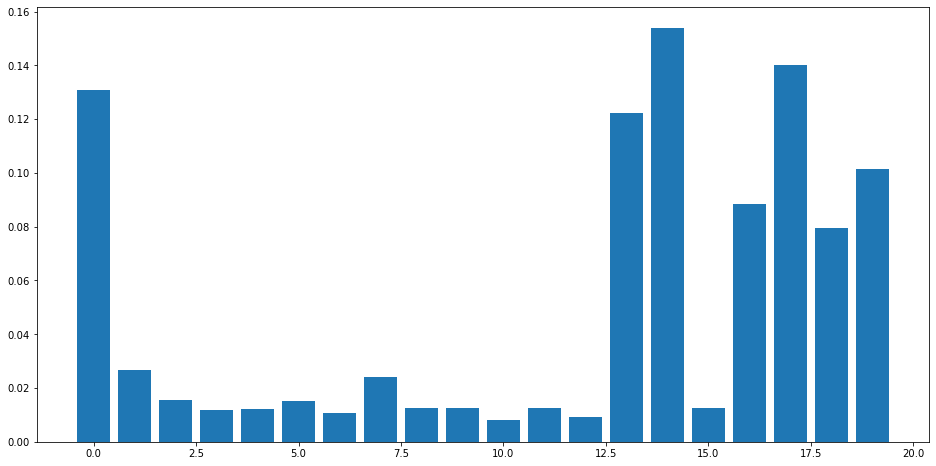

In [284]:
from matplotlib import pyplot
# summarize feature importance
for feat, importance in zip(ks_train[forest_features].columns, clf.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

# get importance
importance = clf.feature_importances_

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical 
# precision. Consider running the example a few times and compare the average outcome.

In [285]:
clf.feature_importances_
clf.n_features_in_

20

In [287]:
ks_test['prediction_rf'] = clf.predict(ks_test[forest_features])
ks_test.to_csv('rf_predictions.tsv', columns=['project_id','prediction'])